In [ ]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [ ]:
eng.addpath("~/Dropbox/code/FALCON2D/functions", nargout=0)
eng.addpath("~/Dropbox/code/FALCON2D", nargout=0)

In [1]:
from deepom.figures import *
from matplotlib_scalebar.scalebar import ScaleBar

data = Images_FigureData.load_figure_data()

data_item = data.data_item
item = data.item
refs = data.refs
inference_item = data.inference_item

scalebar_scale = 130e-9

In [15]:
from pathlib import Path
data_dir = Path.home() / "data"

In [180]:
from imageio import mimwrite
image_file = data_dir / 'image.tif'
image = data_item.image[0]
import numpy as np
pad = 10
image = np.pad(image, ((pad, pad), (0, 0)))
image = image + np.random.rand(*image.shape) * 0.2
image = image.clip(0, 1)
from skimage import img_as_uint
image = img_as_uint(image)
mimwrite(image_file, image[None])
image.shape

(25, 195)

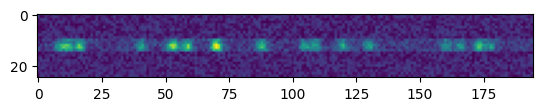

In [181]:
plt.imshow(image)

In [182]:
result = eng.falcon(str(image_file))
result = np.asarray(result)
_, x, y, _, _ = result.T
len(x)

FALCON GPU start...
frames no. 1 ~ 1 are reconstructing...


454

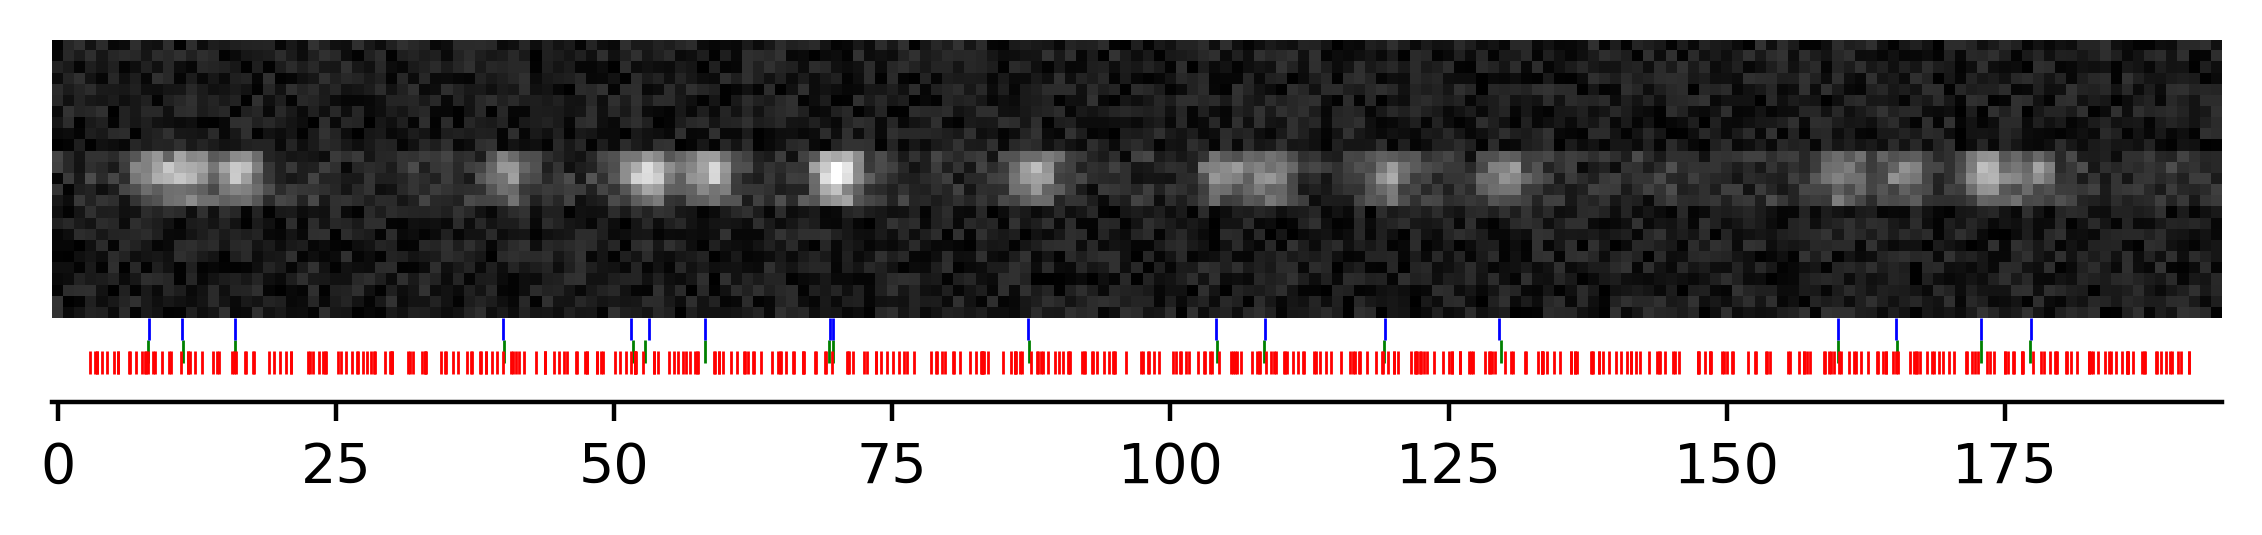

In [183]:
_, axs = pyplot.subplots(figsize=(7, 4), dpi=400, nrows=1)

# image = data_item.image[0]
from imageio import mimread
image = mimread(image_file)[0]
labeled_pos = data_item.labeled_coords.T[1]

pyplot.imshow(image, cmap="gray")
objs = pyplot.eventplot(
    [inference_item.loc_pred - .5, 
    labeled_pos - .5, x - .5], lineoffsets=[-3.5, -1.5, -4.5], colors=["g", "b", "r"],
                        linewidths=.5, linelengths=2)
# pyplot.legend(objs, ["Simulated ground-truth positions", "Neural net predicted localizations"],
#               ncol=3, loc="upper center",
#               fontsize=6,
#               bbox_to_anchor=(0.5, 1.5)
#               )
set_only_x_visible()
# set_formatter(lambda x, _: int((x * data_item.scale) / 1000))
pyplot.gca().invert_yaxis()
# pyplot.gca().add_artist(
#     ScaleBar(scalebar_scale, color="w", box_alpha=0, scale_loc="top", location="upper right", width_fraction=.02,
#              sep=0))
# pyplot.xlabel("sequence position (kb)")
# pyplot.xlim(None, 100)
# pyplot.ylim(-4.5, None)